[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ismaili1995/ecg_classifier]

In [ ]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder/ Google codelab
#!pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu -f https://download.pytorch.org/whl/torch_stable.html
#!pip install python
#!pip install sklearn
#!pip install scripy
#!pip install opencv-python
#!pip install wfdb
#!pip install tqdm
#!pip install tensorboard
#!pip install albumentations

# ECG classification


introduction 


import relevant packages

In [2]:
import json
import wfdb
import pandas as pd
import seaborn as sns
import os 
from os import listdir
from os.path import isfile, join
import pandas as pd

Data Virtulization

Data is in the directory in a folder mit-bih

In [12]:
mitdb_dir = os.getcwd() + "/mit-bih"
def all_patients():
    dat_files = []
    for file in os.listdir(mitdb_dir):
        if file.endswith(".dat"):
           dat_files.append(file)
    return sorted([w.replace(".dat", "") for w in dat_files])

In [29]:
print('Files in Directory {}:\n'.format(mitdb_dir))
print('-------------------------------\n')
onlyfiles = [f for f in listdir(os.getcwd()+'/mit-bih') if isfile(join(os.getcwd()+'/mit-bih', f))]
print(sorted(onlyfiles)[1:],'\n\n***',len(onlyfiles)-1,'data files ***')

print('\nAll patients:\n',all_patients())


Files in Directory /home/mjuni/Projects/dev/ai/pan/mit-bih:

-------------------------------

['100.dat', '100.hea', '100.xws', '101.atr', '101.dat', '101.hea', '101.xws', '102-0.atr', '102.atr', '102.dat', '102.hea', '102.xws', '103.atr', '103.dat', '103.hea', '103.xws', '104.atr', '104.dat', '104.hea', '104.xws', '105.atr', '105.dat', '105.hea', '105.xws', '106.atr', '106.dat', '106.hea', '106.xws', '107.atr', '107.dat', '107.hea', '107.xws', '108.at_', '108.atr', '108.dat', '108.hea', '108.xws', '109.atr', '109.dat', '109.hea', '109.xws', '111.atr', '111.dat', '111.hea', '111.xws', '112.atr', '112.dat', '112.hea', '112.xws', '113.atr', '113.dat', '113.hea', '113.xws', '114.atr', '114.dat', '114.hea', '114.xws', '115.atr', '115.dat', '115.hea', '115.xws', '116.atr', '116.dat', '116.hea', '116.xws', '117.at_', '117.atr', '117.dat', '117.hea', '117.xws', '118.atr', '118.dat', '118.hea', '118.xws', '119.at_', '119.atr', '119.dat', '119.hea', '119.xws', '121.atr', '121.dat', '121.hea', '

In [7]:
#Generate 2D data files 
#Create train and validation dataset from mit-bit database
# from dataset_generation import create
# from annotation_generation_2d import generate
# patients = all_patients()[0: 20] # Select the first 20 patients
# for patient in patients:
#     path = mitdb_dir + patient
#     pass
    # create(path)
#generate()


In [5]:
# load train and validation json files
train = pd.read_json('data/train.json')
val = pd.read_json('data/val.json')
mapping = json.load(open('data/class-mapper.json'))
train.head()




,name,lead,label,filename,path
0,207,MLII,L,357152,/home/mjuni/Projects/dev/ai/pan/data/2D/207/ML...
1,123,MLII,N,213397,/home/mjuni/Projects/dev/ai/pan/data/2D/123/ML...
2,205,MLII,N,64088,/home/mjuni/Projects/dev/ai/pan/data/2D/205/ML...
3,201,MLII,V,342286,/home/mjuni/Projects/dev/ai/pan/data/2D/201/ML...
4,205,MLII,N,7948,/home/mjuni/Projects/dev/ai/pan/data/2D/205/ML...


<AxesSubplot:xlabel='label', ylabel='count'>

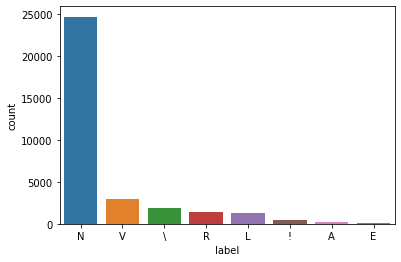

In [6]:
sns.countplot(train['label'], order = train['label'].value_counts().index)

<AxesSubplot:xlabel='label', ylabel='count'>

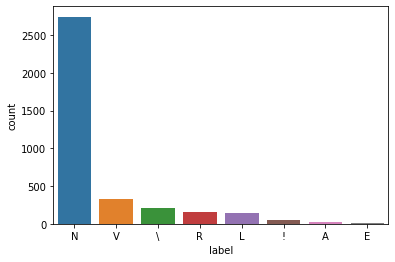

In [4]:
sns.countplot(val['label'], order = val['label'].value_counts().index)

In [4]:
a = 1 / train['label'].value_counts()
a = a / sum(a)
a

N    0.002053
V    0.017165
\    0.027107
R    0.034862
L    0.038665
!    0.119269
A    0.227307
E    0.533573
Name: label, dtype: float64

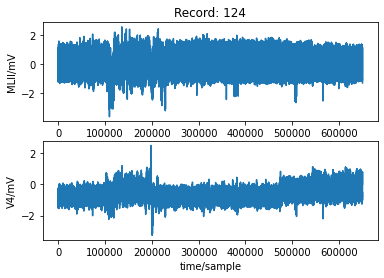

In [13]:
record = wfdb.rdrecord(mitdb_dir+'/'+"124")
wfdb.plot_wfdb(record)

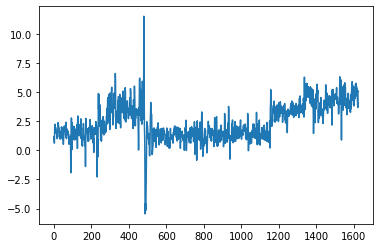

In [14]:
from scipy.signal import find_peaks
import scipy.signal as signal
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
mode = 128
record = wfdb.rdrecord(mitdb_dir+'/'+"124")
for sig_name, signal in zip(record.sig_name, record.p_signal.T):
    ecg = scale(signal).astype('float32')
peaks = find_peaks(ecg, distance=250)[0]
mask_left = (peaks - mode // 2) > 0
mask_right = (peaks + mode // 2) < len(ecg)
mask = mask_left & mask_right
peaks = peaks[mask]
plt.figure()
plt.plot(ecg[peaks])
plt.show()

Training the model

In [23]:
%matplotlib inline
from dataset2d import  EcgDataset2D
import matplotlib.pyplot as plt

In [24]:
# Initialize the the dataloaders
train = "data/train.json"
mapping = "data/class-mapper.json"
train_dl = EcgDataset2D(train,mapping).get_dataloader()

    
  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


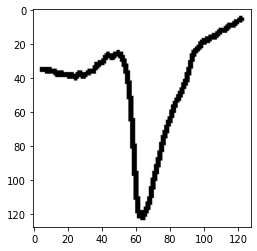

In [29]:

for batch in train_dl:
    inputs = batch["image"]
    image = inputs[0]
    plt.imshow(image.permute(1, 2, 0))
    break


In [10]:
from trainer import Trainer

In [11]:
trainer = Trainer()
trainer.loop()

Epoch - 1


TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/mjuni/.local/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/mjuni/.local/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/mjuni/.local/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/mjuni/Projects/dev/ai/pan/dataset2d.py", line 19, in __getitem__
    img = augment(**{"image": img})['image']
  File "/usr/local/lib/python3.8/dist-packages/albumentations/core/composition.py", line 166, in __call__
    self._check_args(**data)
  File "/usr/local/lib/python3.8/dist-packages/albumentations/core/composition.py", line 221, in _check_args
    raise TypeError("{} must be numpy array type".format(data_name))
TypeError: image must be numpy array type


In [12]:
from trainer import Trainer

In [13]:
trainer = Trainer()
trainer.loop()

Error: Pip module Unable to parse debugpy output, please log an issue with https://github.com/microsoft/vscode-jupyter is required for debugging cells. You will need to install it to debug cells.

Testing the model

In [ ]:
from model import ResNet34

In [ ]:
# load train model from disk
model = ResNet34()
model.load_state_dict(torch.load(""))
model.eval()

In [ ]:
# Train Dataset and Dataloader


In [ ]:
# make predictions
import chart_studio.plotly as py
import plotly.graph_objects as go
def predict(test_data_path):
    self.model.eval()
    pd_class = np.empty(0)
    pd_peaks = np.empty(0)
    with torch.no_grad():
         for i, batch in tqdm(enumerate(self.test_dl)):
             inputs = batch['image'].to(self.config['device'])
             predictions = model(inputs)
             classes = predictions.topk(k=1)[1].view(-1).cpu().numpy()
             pd_class = np.concatenate((pd_class, classes))
             pd_peaks = np.concatenate((pd_peaks, batch['peak']))
        pd_class = pd_class.astype(int)
        pd_peaks = pd_peaks.astype(int)
        annotations = []
        for label, peak in zip(pd_class, pd_peaks):
            if peak < len(test_dl.dataset.signal) and mapping[label] != 'N':
               annotations.append({
                    "x": peak,
                    "y": self.test_dl.dataset.signal[peak],
                    "text": mapping[label],
                    "xref": "x",
                    "yref": "y",
                    "showarrow": True,
                    "arrowcolor": "black",
                    "arrowhead": 1,
                    "arrowsize": 2
                })

        if osp.exists(test_data_path + '.atr'):
            ann = wfdb.rdann(test_data_path, extension='atr')
            for label, peak in zip(ann.symbol, ann.sample):
                if peak < len(test_dl.dataset.signal) and label != 'N':
                    annotations.append({
                        "x": peak,
                        "y": test_dl.dataset.signal[peak] - 0.1,
                        "text": label,
                        "xref": "x",
                        "yref": "y",
                        "showarrow": False,
                        "bordercolor": "#c7c7c7",
                        "borderwidth": 1,
                        "borderpad": 4,
                        "bgcolor": "#ffffff",
                        "opacity": 1
                    })

        fig = go.Figure(data=go.Scatter(x=list(range(len(test_dl.dataset.signal))), y=self.test_dl.dataset.signal))
        fig.update_layout(title='ECG',
                          xaxis_title='Time',
                          yaxis_title='ECG Output Value',
                          title_x=0.5,
                          annotations=annotations,
                          autosize=True)
        py.iplot(fig)